In [10]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
import efficientnet.keras as efn
from tensorflow.keras.applications import EfficientNetB0
from keras.models import Model
# from keras.utils import load_img, img_to_array

In [24]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=30,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    "data/train/",
    target_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42,
    save_to_dir="saved/",
    save_prefix="N",
    save_format='png',
    color_mode="rgb",
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "data/test/",
    target_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

Found 735 images belonging to 7 classes.
Found 315 images belonging to 7 classes.


In [25]:
for i in range(len(train_generator)):
    train_generator.next()

In [12]:
efficient_net = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(64,64,3))

output = efficient_net.layers[-1].output
output = keras.layers.Flatten()(output)

eff = Model(efficient_net.input, output)

# for layer in resnet.layers:
#     layer.trainable = False

    
model = Sequential([
      eff,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(7, activation='softmax')
])
    
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 5120)              4049571   
                                                                 
 dense_6 (Dense)             (None, 64)                327744    
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 4,379,626
Trainable params: 4,337,603
No

In [13]:
epochs = 5

history = model.fit(x = train_generator,validation_data=test_generator ,batch_size=32,verbose=1, epochs=epochs)

Epoch 1/5
23/23 [==============================] - 37s 616ms/step - loss: 1.6771 - accuracy: 0.3524 - val_loss: 2.3231 - val_accuracy: 0.1429
Epoch 2/5
23/23 [==============================] - 13s 551ms/step - loss: 0.8464 - accuracy: 0.7265 - val_loss: 2.5871 - val_accuracy: 0.1429
Epoch 3/5
23/23 [==============================] - 11s 483ms/step - loss: 0.7171 - accuracy: 0.7918 - val_loss: 2.2480 - val_accuracy: 0.1429
Epoch 4/5
23/23 [==============================] - 11s 472ms/step - loss: 0.4777 - accuracy: 0.8626 - val_loss: 2.4106 - val_accuracy: 0.1429
Epoch 5/5
23/23 [==============================] - 11s 476ms/step - loss: 0.3011 - accuracy: 0.9143 - val_loss: 3.1263 - val_accuracy: 0.1429


In [14]:
model.evaluate(test_generator)

10/10 [==============================] - 1s 128ms/step - loss: 3.1263 - accuracy: 0.1429


[3.126315116882324, 0.1428571492433548]

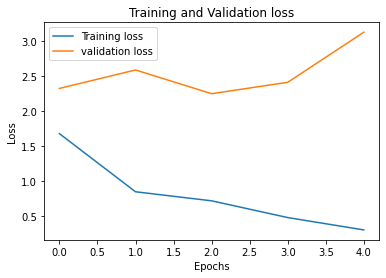

In [15]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
ep = range(epochs)
plt.plot(ep, loss_train, label='Training loss')
plt.plot(ep, loss_val, label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

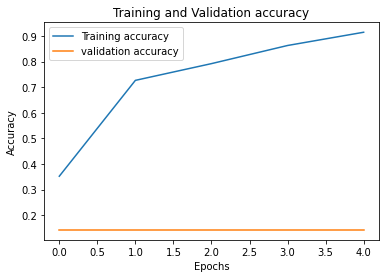

In [16]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
ep = range(epochs)
plt.plot(ep, loss_train,label='Training accuracy')
plt.plot(ep, loss_val, label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()